In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pickle 
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import json 
import joblib
import sys 
import os
import csv
import os

## Data Loading

In [51]:

r = os.getcwd()
static_path = os.path.join(r, "stats", "comparison_files", "comparison_objects", "processed_data_distance_associator_solitair.json")
ace_w_path = os.path.join(r, "CoLT", "CoLT Estimation",  "processed_data_ALL_DISTANCE_ASSOCIATORS_W_UCB.5_final.json")
ace_wo_path= os.path.join(r, "CoLT", "CoLT Estimation", "processed_data_ALL_DISTANCE_ASSOCIATORS_WO_UCB.5_final.json")

In [52]:
r

'/Users/spencerbrosnahan/Documents/GitHub/codenames-ensemble'

In [53]:
with open(static_path, "r") as f:
    static_data = json.load(f)
with open(ace_w_path, "r") as f:
    ace_w_data = json.load(f)
with open(ace_wo_path, "r") as f:
    ace_wo_data = json.load(f)

In [54]:
cols = ["Win Rate", "Average Win Time", "Min Win Time", "Average Red Words Flipped By Game", "Average Blue Words Flipped By Game","Average Bystander Words Flipped By Game", "Average Assassin Words Flipped By Game", "Final Pair Score"]

In [55]:
data = []

In [56]:
for d in [static_data, ace_w_data, ace_wo_data]:
    for cm in d:
        for g in d[cm]:
            row = []
            for s in cols:
                row.append(d[cm][g][s][0])
            data.append(row)

In [57]:
data_table = pd.DataFrame(data, columns=cols)

In [58]:
len(data_table)

113

In [59]:
data_table.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,Final Pair Score
0,0.881853,5.206639,3.224000,8.468587,0.886147,0.771053,0.118147,0.846839
1,0.777933,6.375741,3.725333,8.006267,1.532373,1.340773,0.221760,-0.036113
2,0.957107,4.454772,2.930667,8.815560,0.327027,0.289000,0.042893,1.601976
3,0.880933,5.181492,3.180667,8.477400,0.889693,0.771133,0.119067,0.851417
4,0.857813,5.448871,3.323333,8.371160,1.060760,0.929627,0.142173,0.623495


In [60]:
X = data_table[cols[:-1]]
y = data_table[cols[-1]]

In [61]:
X.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game
0,0.881853,5.206639,3.224000,8.468587,0.886147,0.771053,0.118147
1,0.777933,6.375741,3.725333,8.006267,1.532373,1.340773,0.221760
2,0.957107,4.454772,2.930667,8.815560,0.327027,0.289000,0.042893
3,0.880933,5.181492,3.180667,8.477400,0.889693,0.771133,0.119067
4,0.857813,5.448871,3.323333,8.371160,1.060760,0.929627,0.142173


In [62]:
y.head()

0    0.846839
1   -0.036113
2    1.601976
3    0.851417
4    0.623495
Name: Final Pair Score, dtype: float64

## Expoloratory Data Analysis

From this, we may improve accuracy by using the log of Assassin Words and Average Win Time

In [63]:
def plot_data(data, target, col_name, add, bad_list):
    plt.title(col_name)
    plt.hist(data[col_name])
    plt.show()

    
    plt.title("log of " + col_name)
    if col_name in bad_list:
        plt.hist(np.log(data[col_name] + add))
    else:
        plt.hist(np.log(data[col_name]))
    plt.show()
    
    plt.title(f"{col_name}-CoLT")
    plt.scatter(data[col_name], target)
    plt.show()

    plt.title("log of " + col_name + "-CoLT")
    if col_name in bad_list:
        plt.scatter(np.log(data[col_name] + add), target)
    else:
        plt.scatter(np.log(data[col_name]), target)
    plt.show()

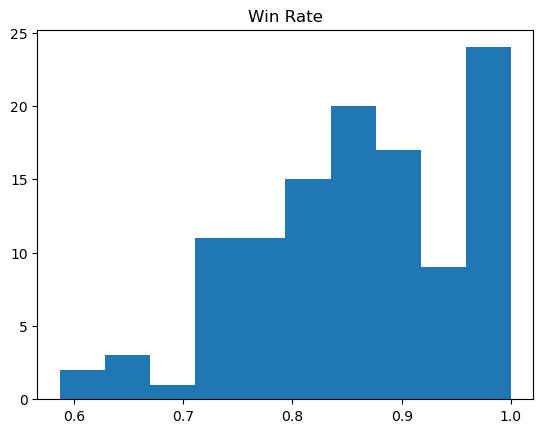

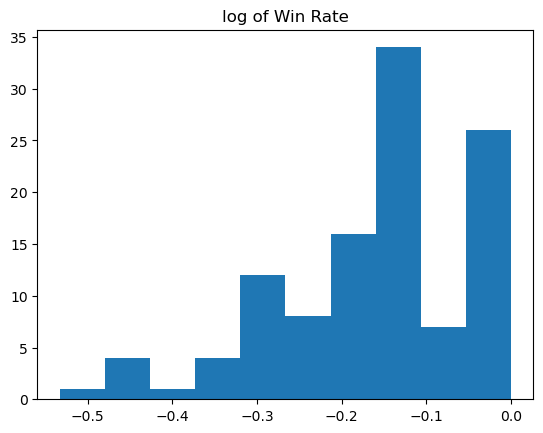

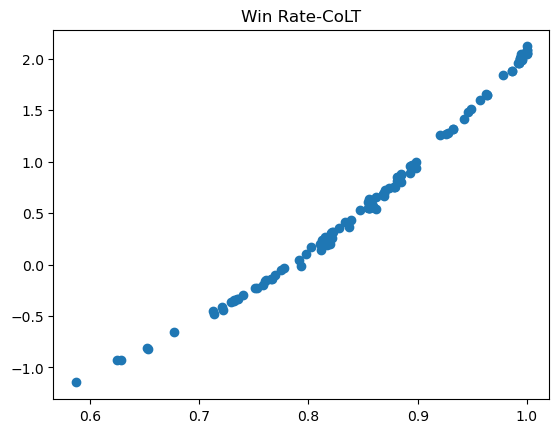

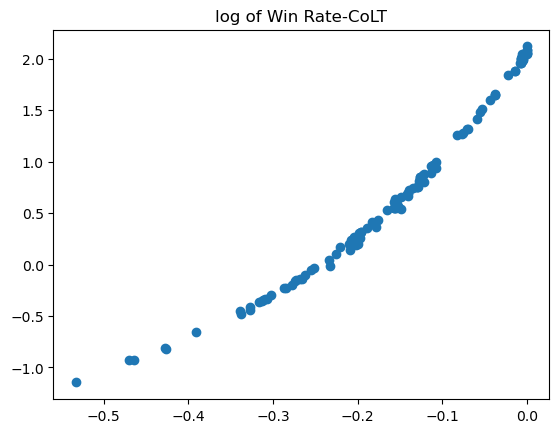

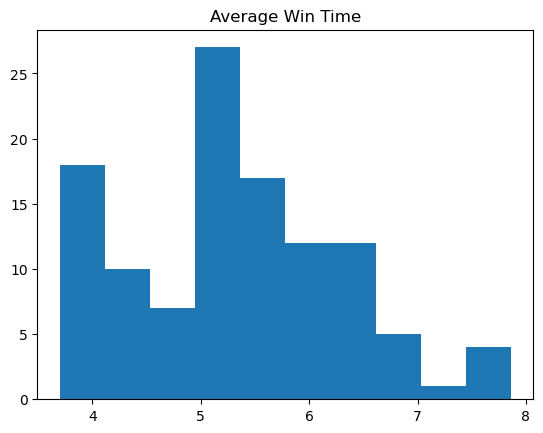

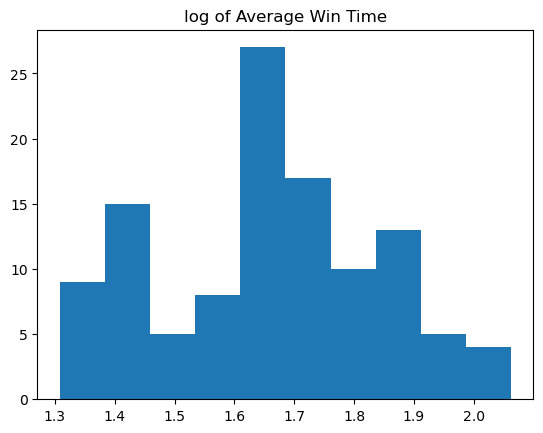

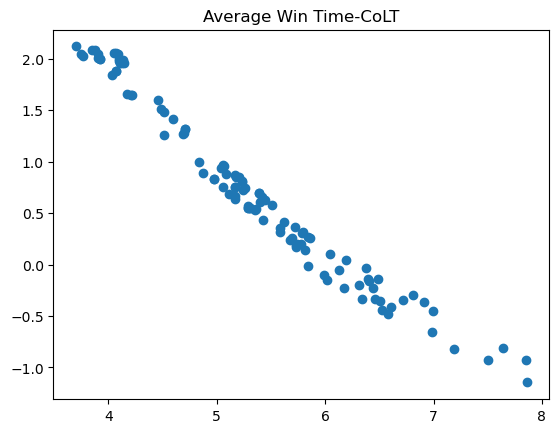

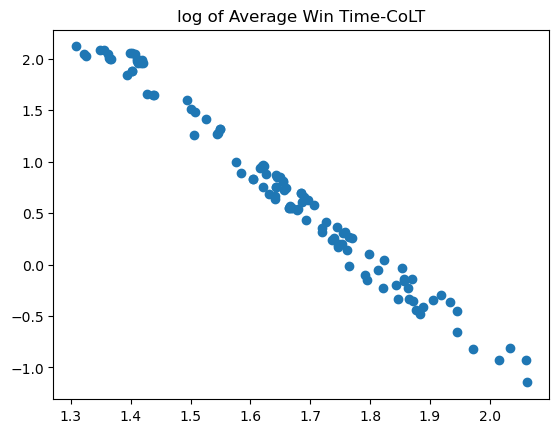

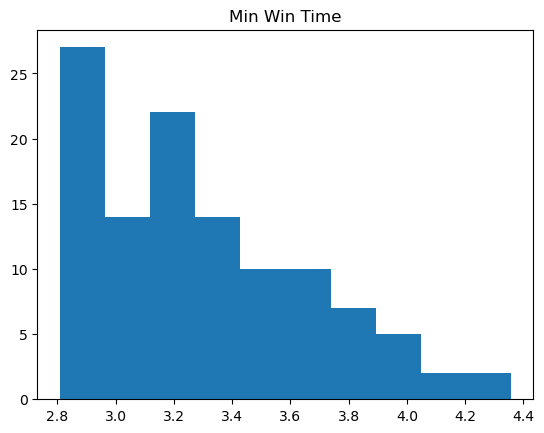

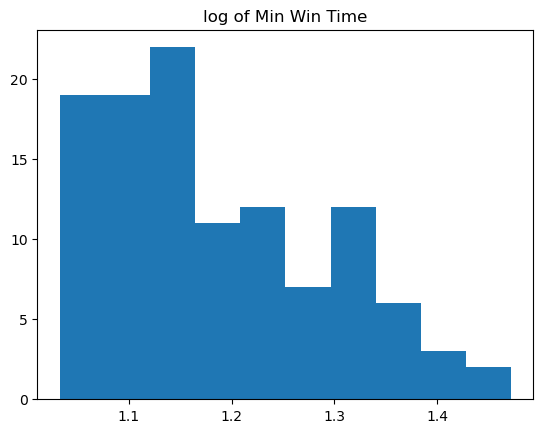

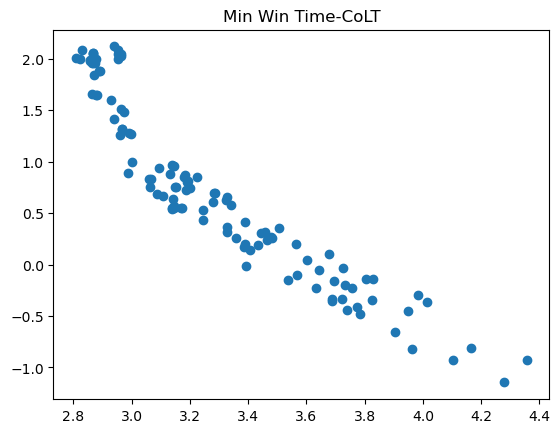

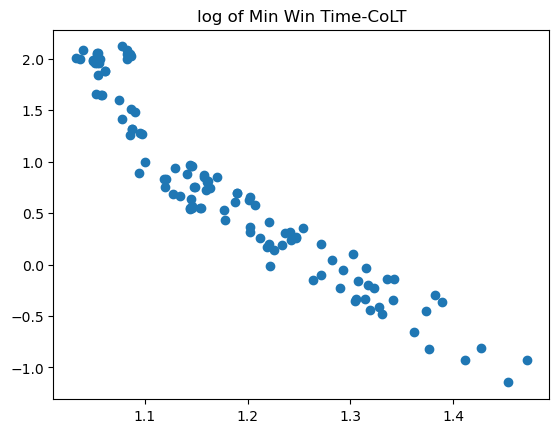

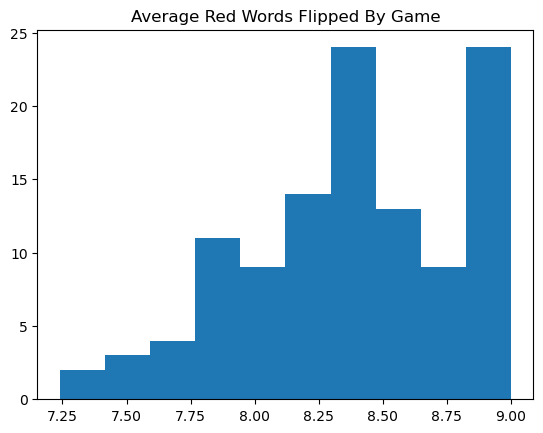

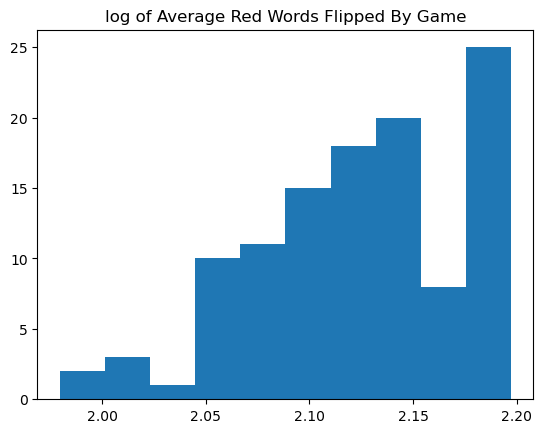

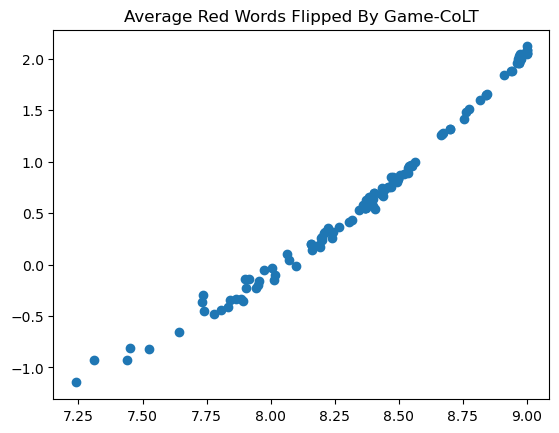

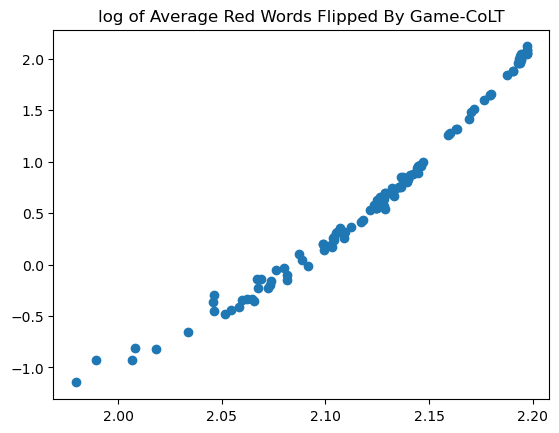

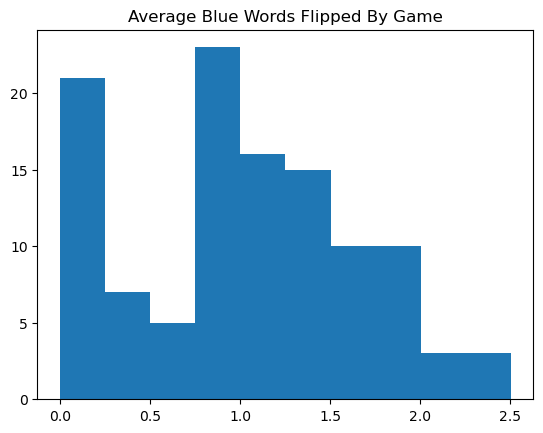

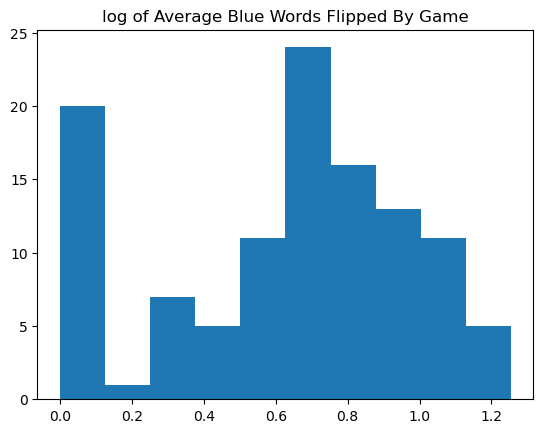

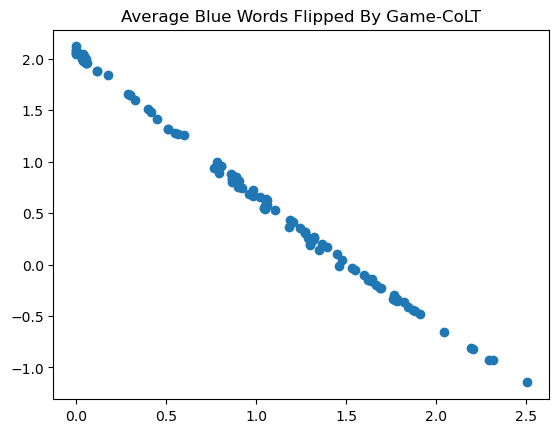

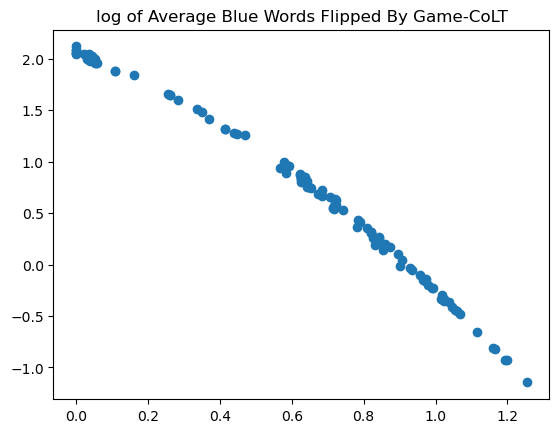

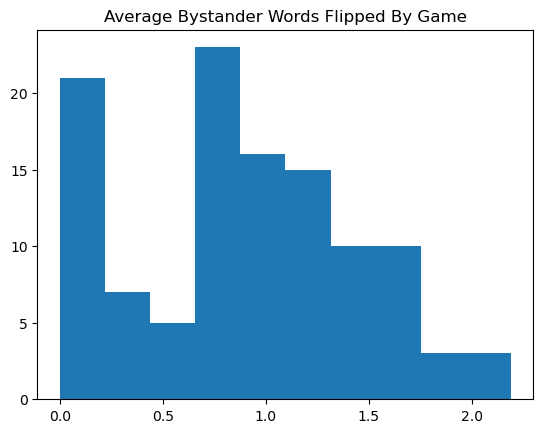

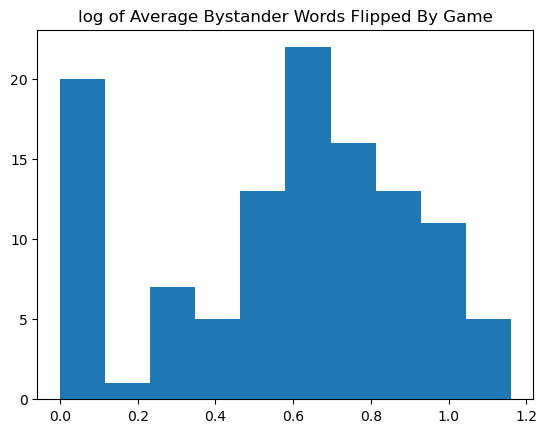

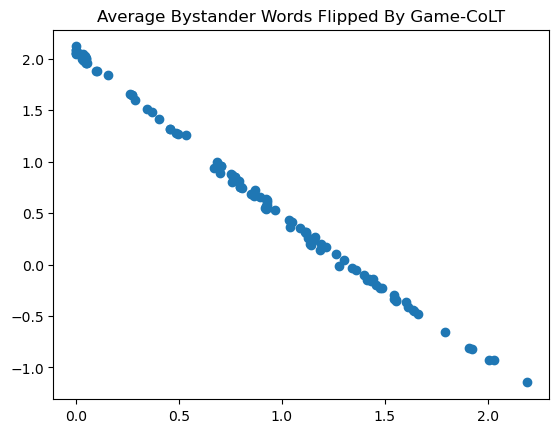

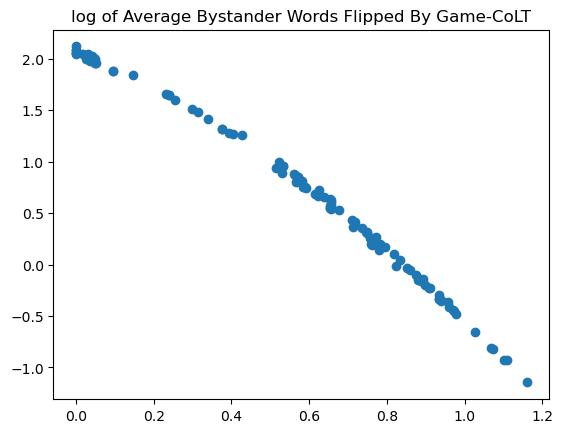

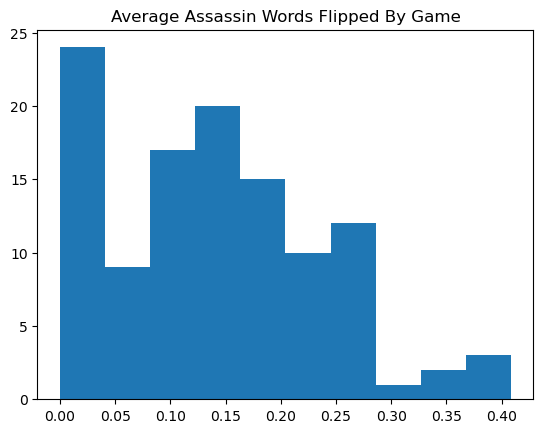

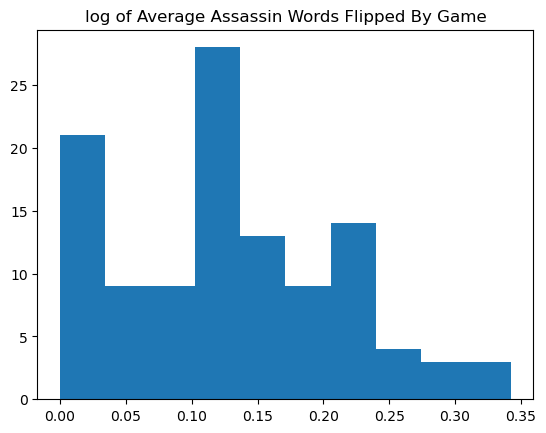

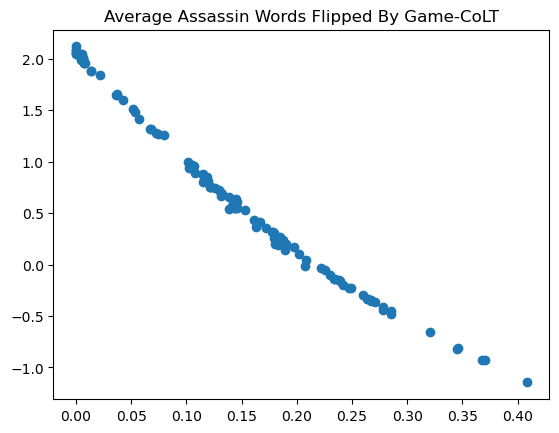

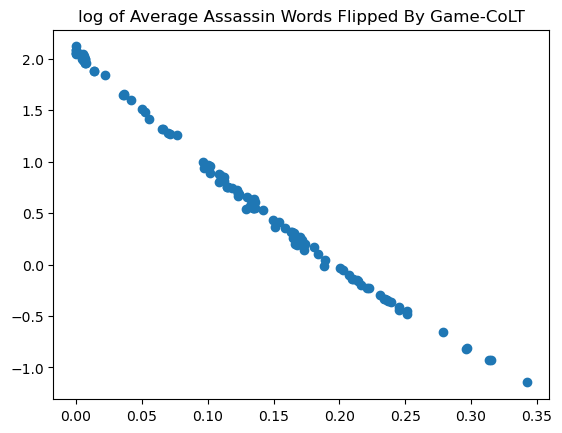

In [64]:
l = ["Average Blue Words Flipped By Game", "Average Bystander Words Flipped By Game", "Average Assassin Words Flipped By Game"]
for p in cols[:-1]:   
    plot_data(data_table, y, p, 1, l)

## Data Transformations/Prep

In [65]:
#We add the log transforms to X 
X["log(Average Assassin Words Flipped By Game + 1)"] = np.log(X["Average Assassin Words Flipped By Game"] + 1)
X["log(Average Win Time)"] = np.log(X["Average Win Time"])
X.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1),log(Average Win Time)
0,0.881853,5.206639,3.224000,8.468587,0.886147,0.771053,0.118147,0.111673,1.649934
1,0.777933,6.375741,3.725333,8.006267,1.532373,1.340773,0.221760,0.200292,1.852500
2,0.957107,4.454772,2.930667,8.815560,0.327027,0.289000,0.042893,0.041999,1.493976
3,0.880933,5.181492,3.180667,8.477400,0.889693,0.771133,0.119067,0.112495,1.645093
4,0.857813,5.448871,3.323333,8.371160,1.060760,0.929627,0.142173,0.132933,1.695409


In [66]:
#Add all higher order terms

poly = PolynomialFeatures(2)
X_hot = poly.fit_transform(X)
hot_names = poly.get_feature_names_out(X.columns)
X_full = pd.DataFrame(X_hot,columns = hot_names)

X_full = X_full.T.drop_duplicates().T
X_full = X_full.dropna()
X_full = X_full.drop(columns=['1'])

X_full.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1),log(Average Win Time),Win Rate^2,...,Average Bystander Words Flipped By Game^2,Average Bystander Words Flipped By Game Average Assassin Words Flipped By Game,Average Bystander Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Bystander Words Flipped By Game log(Average Win Time),Average Assassin Words Flipped By Game^2,Average Assassin Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Assassin Words Flipped By Game log(Average Win Time),log(Average Assassin Words Flipped By Game + 1)^2,log(Average Assassin Words Flipped By Game + 1) log(Average Win Time),log(Average Win Time)^2
0,0.881853,5.206639,3.224000,8.468587,0.886147,0.771053,0.118147,0.111673,1.649934,0.777665,...,0.594523,0.091097,0.086105,1.272187,0.013959,0.013194,0.194934,0.012471,0.184252,2.722284
1,0.777933,6.375741,3.725333,8.006267,1.532373,1.340773,0.221760,0.200292,1.852500,0.605180,...,1.797673,0.297330,0.268547,2.483783,0.049177,0.044417,0.410810,0.040117,0.371042,3.431757
2,0.957107,4.454772,2.930667,8.815560,0.327027,0.289000,0.042893,0.041999,1.493976,0.916053,...,0.083521,0.012396,0.012138,0.431759,0.001840,0.001801,0.064082,0.001764,0.062745,2.231964
3,0.880933,5.181492,3.180667,8.477400,0.889693,0.771133,0.119067,0.112495,1.645093,0.776044,...,0.594647,0.091816,0.086749,1.268586,0.014177,0.013394,0.195876,0.012655,0.185065,2.706331
4,0.857813,5.448871,3.323333,8.371160,1.060760,0.929627,0.142173,0.132933,1.695409,0.735844,...,0.864206,0.132168,0.123578,1.576097,0.020213,0.018900,0.241042,0.017671,0.225376,2.874410


In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [68]:
#Scale the data 
X_scalar = StandardScaler()
X_scalar.fit(X_full)
scaled_X = pd.DataFrame(X_scalar.transform(X_full), columns=X_full.columns)

y_scalar = StandardScaler()
y_scalar.fit(y.values.reshape(-1, 1))
scaled_y= pd.DataFrame(y_scalar.transform(y.values.reshape(-1, 1)), columns=["Final Pair Score"])

In [69]:
scaled_X.head()

,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1),log(Average Win Time),Win Rate^2,...,Average Bystander Words Flipped By Game^2,Average Bystander Words Flipped By Game Average Assassin Words Flipped By Game,Average Bystander Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Bystander Words Flipped By Game log(Average Win Time),Average Assassin Words Flipped By Game^2,Average Assassin Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Assassin Words Flipped By Game log(Average Win Time),log(Average Assassin Words Flipped By Game + 1)^2,log(Average Assassin Words Flipped By Game + 1) log(Average Win Time),log(Average Win Time)^2
0,0.237863,-0.135324,-0.184390,0.202897,-0.165832,-0.176716,-0.236172,-0.197837,-0.045297,0.187402,...,-0.453166,-0.463720,-0.455745,-0.248774,-0.469350,-0.464425,-0.295958,-0.457621,-0.265383,-0.100623
1,-0.818956,1.056642,1.178795,-0.877033,0.847025,0.845858,0.823365,0.844791,1.056196,-0.854090,...,0.702142,0.648738,0.684424,0.862503,0.593410,0.629502,0.824960,0.665677,0.854153,1.062495
2,1.003156,-0.901895,-0.981998,1.013389,-1.042163,-1.041939,-1.005703,-1.017559,-0.893353,1.023009,...,-0.943849,-0.888250,-0.918008,-1.019616,-0.835045,-0.863562,-0.975399,-0.892652,-0.993645,-0.904458
3,0.228507,-0.160963,-0.302218,0.223484,-0.160273,-0.176572,-0.226764,-0.188161,-0.071624,0.177609,...,-0.453048,-0.459842,-0.451726,-0.252077,-0.462765,-0.457394,-0.291069,-0.450130,-0.260514,-0.126776
4,-0.006613,0.111646,0.085709,-0.024681,0.107847,0.107903,0.009522,0.052294,0.201977,-0.065123,...,-0.194207,-0.242177,-0.221561,0.029972,-0.280611,-0.264519,-0.056548,-0.246324,-0.018909,0.148774


In [70]:
scaled_y[:5]

,Final Pair Score
0,0.170852
1,-0.867766
2,1.059120
3,0.176237
4,-0.091868


In [71]:
scaled_X = sm.add_constant(scaled_X)

In [72]:
#We now have all of the data transformations we could possibly want
scaled_X.head()

,const,Win Rate,Average Win Time,Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,Average Assassin Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1),log(Average Win Time),...,Average Bystander Words Flipped By Game^2,Average Bystander Words Flipped By Game Average Assassin Words Flipped By Game,Average Bystander Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Bystander Words Flipped By Game log(Average Win Time),Average Assassin Words Flipped By Game^2,Average Assassin Words Flipped By Game log(Average Assassin Words Flipped By Game + 1),Average Assassin Words Flipped By Game log(Average Win Time),log(Average Assassin Words Flipped By Game + 1)^2,log(Average Assassin Words Flipped By Game + 1) log(Average Win Time),log(Average Win Time)^2
0,1.0,0.237863,-0.135324,-0.184390,0.202897,-0.165832,-0.176716,-0.236172,-0.197837,-0.045297,...,-0.453166,-0.463720,-0.455745,-0.248774,-0.469350,-0.464425,-0.295958,-0.457621,-0.265383,-0.100623
1,1.0,-0.818956,1.056642,1.178795,-0.877033,0.847025,0.845858,0.823365,0.844791,1.056196,...,0.702142,0.648738,0.684424,0.862503,0.593410,0.629502,0.824960,0.665677,0.854153,1.062495
2,1.0,1.003156,-0.901895,-0.981998,1.013389,-1.042163,-1.041939,-1.005703,-1.017559,-0.893353,...,-0.943849,-0.888250,-0.918008,-1.019616,-0.835045,-0.863562,-0.975399,-0.892652,-0.993645,-0.904458
3,1.0,0.228507,-0.160963,-0.302218,0.223484,-0.160273,-0.176572,-0.226764,-0.188161,-0.071624,...,-0.453048,-0.459842,-0.451726,-0.252077,-0.462765,-0.457394,-0.291069,-0.450130,-0.260514,-0.126776
4,1.0,-0.006613,0.111646,0.085709,-0.024681,0.107847,0.107903,0.009522,0.052294,0.201977,...,-0.194207,-0.242177,-0.221561,0.029972,-0.280611,-0.264519,-0.056548,-0.246324,-0.018909,0.148774


In [73]:
#get a holdout set so we can see if the features we select are good or not
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=.2, random_state=1234)

## Feature Selection

In [74]:
import copy

In [75]:
def pval_selection(curr_cols):
    curr_cols = copy.deepcopy(curr_cols)
    curr_model = sm.OLS(y_train, X_train[curr_cols]).fit()

    while(max(curr_model.pvalues[1:]) > 0.05 and len(curr_cols) > 1):
        max_pvalue_ind = np.argmax(curr_model.pvalues[1:])+1
        del curr_cols[max_pvalue_ind]
        curr_model = sm.OLS(y_train, X_train[curr_cols]).fit()

    return curr_model, curr_cols

In [76]:
list(scaled_X.columns).index("Min Win Time")

3

In [77]:
base_cols = list(scaled_X.columns[:8])
full_cols = list(scaled_X.columns)
base_log_cols = copy.deepcopy(base_cols)
base_log_cols[base_log_cols.index("Average Win Time")] = full_cols[full_cols.index("log(Average Win Time)")]
base_log_cols[base_log_cols.index("Average Assassin Words Flipped By Game")] = full_cols[full_cols.index("log(Average Assassin Words Flipped By Game + 1)")]

In [78]:
scaled_X[base_log_cols].head()

,const,Win Rate,log(Average Win Time),Min Win Time,Average Red Words Flipped By Game,Average Blue Words Flipped By Game,Average Bystander Words Flipped By Game,log(Average Assassin Words Flipped By Game + 1)
0,1.0,0.237863,-0.045297,-0.184390,0.202897,-0.165832,-0.176716,-0.197837
1,1.0,-0.818956,1.056196,1.178795,-0.877033,0.847025,0.845858,0.844791
2,1.0,1.003156,-0.893353,-0.981998,1.013389,-1.042163,-1.041939,-1.017559
3,1.0,0.228507,-0.071624,-0.302218,0.223484,-0.160273,-0.176572,-0.188161
4,1.0,-0.006613,0.201977,0.085709,-0.024681,0.107847,0.107903,0.052294


In [79]:
m, base_reduced_cols = pval_selection(base_cols)
m.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final Pair Score   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.704e+04
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          1.12e-124
Time:                        16:47:49   Log-Likelihood:                 189.07
No. Observations:                  90   AIC:                            -366.1
Df Residuals:                      84   BIC:                            -351.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0012      0.003      0.363      0.718      -0.005       0.008
Win Rate                                   -5.5479      1.408     -3.941      0.000      -8.347      -2.748
Average Win Time                           -0.1207      0.032     -3.793      0.000      -0.184      -0.057
Min Win Time                                0.1087      0.018      6.043      0.000       0.073       0.144
Average Bystander Words Flipped By Game    -1.0080      0.094    -10.756      0.000      -1.194      -0.822
Average Assassin Words Flipped By Game     -5.5178      1.488     -3.709      0.000      -8.476      -2.560
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.344
Skew:                          -0.393   Prob(JB):                        0.310
Kurtosis:                       2.921   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
m, log_base_reduced_columns = pval_selection(base_log_cols)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final Pair Score   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.545e+04
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.85e-124
Time:                        16:47:49   Log-Likelihood:                 193.40
No. Observations:                  90   AIC:                            -372.8
Df Residuals:                      83   BIC:                            -355.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.0011      0.003      0.360      0.720      -0.005       0.007
Win Rate                                           -0.9203      0.167     -5.521      0.000      -1.252      -0.589
log(Average Win Time)                              -0.0566      0.028     -2.015      0.047      -0.113      -0.001
Min Win Time                                        0.0955      0.018      5.272      0.000       0.059       0.132
Average Red Words Flipped By Game                   0.2077      0.069      3.004      0.004       0.070       0.345
Average Blue Words Flipped By Game                 -0.5910      0.181     -3.264      0.002      -0.951      -0.231
log(Average Assassin Words Flipped By Game + 1)    -1.1523      0.320     -3.600      0.001      -1.789      -0.516
==============================================================================
Omnibus:                        2.773   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.089
Skew:                          -0.315   Prob(JB):                        0.352
Kurtosis:                       3.399   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
m, full_reduced_cols = pval_selection(full_cols)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Final Pair Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9721.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           9.80e-72
Time:                        16:47:50   Log-Likelihood:                 297.82
No. Observations:                  90   AIC:                            -497.6
Df Residuals:                      41   BIC:                            -375.2
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.0035      0.002      1.435      0.159      -0.001       0.008
Win Rate                                                                                -9656.0558   2614.059     -3.694      0.001   -1.49e+04   -4376.856
Average Win Time                                                                         1.902e+04   4782.372      3.976      0.000    9357.393    2.87e+04
Average Red Words Flipped By Game                                                        2765.0352    455.296      6.073      0.000    1845.547    3684.524
Average Blue Words Flipped By Game                                                       8723.6811   1504.799      5.797      0.000    5684.678    1.18e+04
Average Bystander Words Flipped By Game                                                  1699.1675    452.452      3.755      0.001     785.422    2612.913
Average Assassin Words Flipped By Game                                                   -4.17e+05   9.51e+04     -4.383      0.000   -6.09e+05   -2.25e+05
log(Average Assassin Words Flipped By Game + 1)                                          3.439e+05   7.93e+04      4.338      0.000    1.84e+05    5.04e+05
log(Average Win Time)                                                                    1481.1259    437.812      3.383      0.002     596.947    2365.305
Win Rate^2                                                                               1.425e+04   2698.598      5.281      0.000    8802.615    1.97e+04
Win Rate Average Win Time                                                                1100.5978    189.285      5.815      0.000     718.329    1482.866
Win Rate Min Win Time                                                                      -5.1386      1.738     -2.957      0.005      -8.648      -1.629
Win Rate Average Red Words Flipped By Game                                              -7112.0220   1187.572     -5.989      0.000   -9510.372   -4713.672
Win Rate Average Blue Words Flipped By Game                                             -5380.5605    947.836     -5.677      0.000   -7294.755   -3466.366
Win Rate Average Bystander Words Flipped By Game                                        -1781.4640    362.712     -4.912      0.000   -2513.976   -1048.953
Win Rate log(Average Assassin Words Flipped By Game + 1)                                 1.725e+04   3123.839      5.521      0.000    1.09e+04    2.36e+04
Win Rate log(Average Win Time)                                                          -1043.0338    186.274     -5.59

## Model Building/ Testing

Best features to use were the base log cols which are the basic features with the appropriate log transformations for our exploratory data analysis. We can also predict fairly well using only Win Rate and the log of Average Win Time

In [82]:
# I have the different column options of "base_cols", "full_cols", and "reduced_cols"
#We need to drop the constant off eace because we are now working in sklearn
base_cols = base_cols[1:]
reduced_base_cols = base_reduced_cols[1:]
base_log_cols = base_log_cols[1:]
log_base_reduced_columns = log_base_reduced_columns[1:]
full_cols = full_cols[1:]
full_reduced_cols = full_reduced_cols[1:]

In [83]:
base_cols

['Win Rate',
 'Average Win Time',
 'Min Win Time',
 'Average Red Words Flipped By Game',
 'Average Blue Words Flipped By Game',
 'Average Bystander Words Flipped By Game',
 'Average Assassin Words Flipped By Game']

In [84]:
def create_sk_regression_model(X_train, y_train):
    reg_prep = LinearRegression()
    mod = reg_prep.fit(X_train, y_train)
    return mod 

def get_model_scores(in_p, in_t, out_p, out_t):

    in_sample_mspe = np.sqrt(mean_squared_error(in_t, in_p))
    out_sample_mspe = np.sqrt(mean_squared_error(out_t, out_p))
    in_sample_r2 = r2_score(in_t, in_p)
    out_sample_r2 = r2_score(out_t, out_p)
    
    print("In sample MSPE: ", in_sample_mspe)
    print("Out of sample MSPE: ", out_sample_mspe)
    print("In sample R^2: ", in_sample_r2)
    print("Out of sample R^2: ", out_sample_r2)

def get_predictions(model, in_X, out_X):
    in_preds = model.predict(in_X)
    out_preds = model.predict(out_X)
    return in_preds, out_preds

def test_features(features, X_train, X_test, y_train, y_test):
    model = create_sk_regression_model(X_train[features], y_train)
    in_preds, out_preds = get_predictions(model, X_train[features], X_test[features])
    get_model_scores(in_preds, y_train, out_preds, y_test)

In [85]:
test_features(base_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.028906489902820902
Out of sample MSPE:  0.032064956820643295
In sample R^2:  0.9990613050945402
Out of sample R^2:  0.9991462753863012


In [86]:
test_features(reduced_base_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.029607749668577696
Out of sample MSPE:  0.029925880126865145
In sample R^2:  0.99901520792803
Out of sample R^2:  0.9992563812225355


In [87]:
test_features(base_log_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.028153635509503987
Out of sample MSPE:  0.02621460736850332
In sample R^2:  0.9991095639985149
Out of sample R^2:  0.9994293849806092


In [88]:
test_features(log_base_reduced_columns, X_train, X_test, y_train, y_test)

In sample MSPE:  0.028217290713249223
Out of sample MSPE:  0.026489419792513628
In sample R^2:  0.9991055329054328
Out of sample R^2:  0.9994173585528175


In [89]:
test_features(full_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.008696471668888804
Out of sample MSPE:  0.15726585710245455
In sample R^2:  0.9999150389411566
Out of sample R^2:  0.979463549804256


In [90]:
test_features(full_reduced_cols, X_train, X_test, y_train, y_test)

In sample MSPE:  0.008843580973320563
Out of sample MSPE:  0.15543403032028105
In sample R^2:  0.9999121402310961
Out of sample R^2:  0.9799391791181119


In [91]:
## I want to see how well I can predict with only Win time and win rate
test_features(["Win Rate", "log(Average Win Time)"], X_train, X_test, y_train, y_test)

In sample MSPE:  0.10415156138930369
Out of sample MSPE:  0.11493630473706994
In sample R^2:  0.9878138838435486
Out of sample R^2:  0.9890309012988019


In [92]:
test_features(["Win Rate", "Average Win Time"], X_train, X_test, y_train, y_test)

In sample MSPE:  0.1346615265131948
Out of sample MSPE:  0.16915785042021805
In sample R^2:  0.9796286031189543
Out of sample R^2:  0.9762403083969201


In [93]:
test_features(["Win Rate", "log(Average Win Time)", "Min Win Time"], X_train, X_test, y_train, y_test)

In sample MSPE:  0.08038941341134488
Out of sample MSPE:  0.08343002964124943
In sample R^2:  0.9927400862243614
Out of sample R^2:  0.9942203534584063


## Pipeline Setup

In [94]:

class MyPipeline:
    def __init__(self, model=None, X_scaler=None, y_scaler=None, log_indices=None, log1_indices=None, obj=None):

        #check stuff 
        if model == None and  X_scalar == None and y_scalar == None and log_indices == None and log1_indices == None and obj == None:
            raise Exception("Invalid arguments")
        
        if obj != None:
            try:
                self.model = obj.model 
            except:
                self.model = None
            try:
                self.X_scaler = obj.X_scaler
            except:
                self.X_scaler = None
            try:
                self.y_scaler = obj.y_scaler 
            except:
                self.y_scaler = None
            try:
                self.log_indices = obj.log_indices 
            except:
                self.log_indices = []
            try:
                self.log1_indices = obj.log1_indices
            except:
                self.log1_indices = []
        else:
            self.model = model 
            self.X_scaler = X_scaler 
            self.y_scaler = y_scaler
            self.log_indices = log_indices
            self.log1_indices = log1_indices

    
    def predict(self, data):
        #log transform the data 
        for i in self.log_indices:
            data[:, i] = np.log(data[:, i])
        for i in self.log1_indices:
            data[:, i] = np.log(data[:, i] + 1)

        #scale it
        data = self.X_scaler.transform(data)

        out = self.model.predict(data)

        out = self.y_scaler.inverse_transform(out.reshape(-1, 1))

        return out

def create_pipeline(cols, features, target, log_indices, log1_indices):
    features = features[cols].to_numpy()
    X_scale = StandardScaler()
    X_scale.fit(features)

    target = target.to_numpy().reshape(-1, 1)
    y_scale = StandardScaler()
    y_scale.fit(target)

    scaled_X = X_scale.transform(features)
    scaled_y = y_scale.transform(target)

    model = create_sk_regression_model(scaled_X, scaled_y)

    pipe = MyPipeline(model, X_scale, y_scale, log_indices, log1_indices)

    return pipe
    



In [115]:
pipe = create_pipeline(["Win Rate", "log(Average Win Time)"], X_full, y, [1], [])

In [116]:
pipe.predict(X[["Win Rate", "Average Win Time"]].to_numpy()[:3])

array([[ 0.81544147],
       [-0.10176998],
       [ 1.50267521]])

In [117]:
y[:3]

0    0.846839
1   -0.036113
2    1.601976
Name: Final Pair Score, dtype: float64

In [118]:
save_path = os.path.join(r, "CoLT", "CoLT Estimation", "CoLT-Estimator-Pipeline.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(pipe, f)

In [119]:
pipe.model.coef_

array([[ 0.46064129, -0.53754478]])

## Use Final Model

In [120]:
path = save_path

with open(path, "rb") as f:
    m = pickle.load(f)



In [121]:
m = MyPipeline(obj=m)

In [122]:
m.model.coef_

array([[ 0.46064129, -0.53754478]])

In [123]:
m.predict(np.array([[.90, 9.1], 
                        [.867, 7.4],
                        [.667, 6.2],
                        [.778, 6.4]]))

array([[-0.49971882],
       [-0.11727172],
       [-0.4740964 ],
       [-0.11094139]])

# Kim Comparison


In [301]:
path = "/Users/spencerbrosnahan/Documents/GitHub/codenames-ai/stats/other/kim-spymaster-comparison.csv"

df = pd.read_csv(path)

In [302]:
df.head()

,Unnamed: 0,Win Rate,Unnamed: 2,Unnamed: 3,Unnamed: 4,Win Time,Unnamed: 6,Unnamed: 7,Unnamed: 8,Min Win Time,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Team,Low,Medium,High,Average,Low,Medium,High,Average,Low,Medium,High,Average
1,w2v-g50 with w2v-g50,86.7,83.3,100,90,5.7,4.9,3.4,4.666666667,4,3,3,3.333333333
2,w2v-g50 with w2v-g100,96.7,96.7,86.7,93.36666667,8.3,6.3,4.7,6.433333333,7,4,3,4.666666667
3,w2v-g50 with w2v-g200,96.7,96.7,66.7,86.7,8.3,6.3,5,6.533333333,7,4,3,4.666666667
4,w2v-g50 with w2v-g300,93.3,93.3,80,88.86666667,8.4,6.4,4.9,6.566666667,7,4,3,4.666666667


In [303]:
#This is the data we'll use
dfc = df.iloc[1:, :]
dfc.head()

,Unnamed: 0,Win Rate,Unnamed: 2,Unnamed: 3,Unnamed: 4,Win Time,Unnamed: 6,Unnamed: 7,Unnamed: 8,Min Win Time,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,w2v-g50 with w2v-g50,86.7,83.3,100,90,5.7,4.9,3.4,4.666666667,4,3,3,3.333333333
2,w2v-g50 with w2v-g100,96.7,96.7,86.7,93.36666667,8.3,6.3,4.7,6.433333333,7,4,3,4.666666667
3,w2v-g50 with w2v-g200,96.7,96.7,66.7,86.7,8.3,6.3,5,6.533333333,7,4,3,4.666666667
4,w2v-g50 with w2v-g300,93.3,93.3,80,88.86666667,8.4,6.4,4.9,6.566666667,7,4,3,4.666666667
5,w2v-g50 with w2v,90,86.7,66.7,81.13333333,9.1,7.4,6.2,7.566666667,7,5,5,5.666666667


In [304]:
len(dfc.columns)

13

In [305]:
new_cols = [df.iloc[0, 0]]
for t, d in zip(list(df.columns)[1:], list(df.iloc[0, 1:])):
    if "Unnamed" not in t:
        curr_stat = t
    new_cols.append(d + " ~ " + curr_stat)

In [306]:
len(new_cols)

13

In [307]:
new_cols[0]

'Team'

In [308]:
data = pd.DataFrame(dfc.to_numpy(), columns=new_cols)

In [309]:
data.set_index(new_cols[0], inplace=True)

In [310]:
data = data.astype(float)

In [311]:
data.head()

,Low ~ Win Rate,Medium ~ Win Rate,High ~ Win Rate,Average ~ Win Rate,Low ~ Win Time,Medium ~ Win Time,High ~ Win Time,Average ~ Win Time,Low ~ Min Win Time,Medium ~ Min Win Time,High ~ Min Win Time,Average ~ Min Win Time
Team,,,,,,,,,,,,
w2v-g50 with w2v-g50,86.7,83.3,100.0,90.000000,5.7,4.9,3.4,4.666667,4.0,3.0,3.0,3.333333
w2v-g50 with w2v-g100,96.7,96.7,86.7,93.366667,8.3,6.3,4.7,6.433333,7.0,4.0,3.0,4.666667
w2v-g50 with w2v-g200,96.7,96.7,66.7,86.700000,8.3,6.3,5.0,6.533333,7.0,4.0,3.0,4.666667
w2v-g50 with w2v-g300,93.3,93.3,80.0,88.866667,8.4,6.4,4.9,6.566667,7.0,4.0,3.0,4.666667
w2v-g50 with w2v,90.0,86.7,66.7,81.133333,9.1,7.4,6.2,7.566667,7.0,5.0,5.0,5.666667


In [312]:
for c in [e for e in data.columns if "Win Rate" in e]:
    data[c] = data[c] / 100


In [313]:
data.head()

,Low ~ Win Rate,Medium ~ Win Rate,High ~ Win Rate,Average ~ Win Rate,Low ~ Win Time,Medium ~ Win Time,High ~ Win Time,Average ~ Win Time,Low ~ Min Win Time,Medium ~ Min Win Time,High ~ Min Win Time,Average ~ Min Win Time
Team,,,,,,,,,,,,
w2v-g50 with w2v-g50,0.867,0.833,1.000,0.900000,5.7,4.9,3.4,4.666667,4.0,3.0,3.0,3.333333
w2v-g50 with w2v-g100,0.967,0.967,0.867,0.933667,8.3,6.3,4.7,6.433333,7.0,4.0,3.0,4.666667
w2v-g50 with w2v-g200,0.967,0.967,0.667,0.867000,8.3,6.3,5.0,6.533333,7.0,4.0,3.0,4.666667
w2v-g50 with w2v-g300,0.933,0.933,0.800,0.888667,8.4,6.4,4.9,6.566667,7.0,4.0,3.0,4.666667
w2v-g50 with w2v,0.900,0.867,0.667,0.811333,9.1,7.4,6.2,7.566667,7.0,5.0,5.0,5.666667


In [320]:
#Now we use our pipe to predict scores 
low_indices = [i for i in range(len(data.columns)) if "Low" in list(data.columns)[i]]
med_indices = [i for i in range(len(data.columns)) if "Medium" in list(data.columns)[i]]
high_indices = [i for i in range(len(data.columns)) if "High" in list(data.columns)[i]]
avg_indices = [i for i in range(len(data.columns)) if "Average" in list(data.columns)[i]]

In [322]:
low_data = data.iloc[:, low_indices]
med_data = data.iloc[:, med_indices]
high_data = data.iloc[:, high_indices]
avg_data = data.iloc[:, avg_indices]

In [323]:
low_features = low_data.drop(columns=[i for i in low_data.columns if "Min Win Time" in i])
med_features = med_data.drop(columns=[i for i in med_data.columns if "Min Win Time" in i])
high_features = high_data.drop(columns=[i for i in high_data.columns if "Min Win Time" in i])
avg_features = avg_data.drop(columns=[i for i in avg_data.columns if "Min Win Time" in i])

In [324]:
low_preds = pipe.predict(low_features.to_numpy())
med_preds = pipe.predict(med_features.to_numpy())
high_preds = pipe.predict(high_features.to_numpy())
avg_preds = pipe.predict(avg_features.to_numpy())

In [325]:
temp_data = np.concatenate([low_preds, med_preds, high_preds, avg_preds], axis=1)

In [326]:
colt_df = pd.DataFrame(temp_data, columns=["Low ~ CoLT", "Medium ~ CoLT", "High ~ CoLT", "Average ~ CoLT"])


In [327]:
colt_df.head()

,Low ~ CoLT,Medium ~ CoLT,High ~ CoLT,Average ~ CoLT
0,0.531514,0.771561,2.344702,1.159755
1,-0.003139,0.681528,1.010557,0.496668
2,-0.003139,0.681528,0.059792,0.192661
3,-0.168389,0.506911,0.640039,0.266377
4,-0.498684,-0.116668,-0.474400,-0.393840


In [328]:
counts = {e:0 for e in colt_df.columns}
counts

{'Low ~ CoLT': 0, 'Medium ~ CoLT': 0, 'High ~ CoLT': 0, 'Average ~ CoLT': 0}

In [329]:
bests = np.array([list(colt_df.columns)[np.argmax(row)] for row in colt_df.to_numpy()]).reshape(-1, 1)

In [330]:
for e in bests:
    counts[e[0]] += 1
counts

{'Low ~ CoLT': 1, 'Medium ~ CoLT': 5, 'High ~ CoLT': 34, 'Average ~ CoLT': 0}

In [332]:
colt_df["Best Team"] = bests

In [333]:
colt_df.head()

,Low ~ CoLT,Medium ~ CoLT,High ~ CoLT,Average ~ CoLT,Best Team
0,0.531514,0.771561,2.344702,1.159755,High ~ CoLT
1,-0.003139,0.681528,1.010557,0.496668,High ~ CoLT
2,-0.003139,0.681528,0.059792,0.192661,Medium ~ CoLT
3,-0.168389,0.506911,0.640039,0.266377,High ~ CoLT
4,-0.498684,-0.116668,-0.474400,-0.393840,Medium ~ CoLT


In [334]:
data.index

Index(['w2v-g50 with w2v-g50', 'w2v-g50 with w2v-g100',
       'w2v-g50 with w2v-g200', 'w2v-g50 with w2v-g300', 'w2v-g50 with w2v',
       'w2v-g50 with g50', 'w2v-g50 with g100', 'w2v-g50 with g200',
       'w2v-g50 with g300', 'Average', 'w2v-g100 with w2v-g50',
       'w2v-g100 with w2v-g100', 'w2v-g100 with w2v-g200',
       'w2v-g100 with w2v-g300', 'w2v-g100 with w2v', 'w2v-g100 with g50',
       'w2v-g100 with g100', 'w2v-g100 with g200', 'w2v-g100 with g300',
       'Average', 'w2v-g200 with w2v-g50', 'w2v-g200 with w2v-g100',
       'w2v-g200 with w2v-g200', 'w2v-g200 with w2v-g300', 'w2v-g200 with w2v',
       'w2v-g200 with g50', 'w2v-g200 with g100', 'w2v-g200 with g200',
       'w2v-g200 with g300', 'Average', 'w2v-g300 with w2v-g50',
       'w2v-g300 with w2v-g100', 'w2v-g300 with w2v-g200',
       'w2v-g300 with w2v-g300', 'w2v-g300 with w2v', 'w2v-g300 with g50',
       'w2v-g300 with g100', 'w2v-g300 with g200', 'w2v-g300 with g300',
       'Average'],
      dtype='ob

In [335]:
teams = np.array(data.index)
teams = teams.reshape(-1, 1)
teams[0]

array(['w2v-g50 with w2v-g50'], dtype=object)

In [336]:
colt_df.insert(0, "Team", teams)

In [337]:
colt_df.set_index("Team", inplace=True)

In [338]:
colt_df.head()

,Low ~ CoLT,Medium ~ CoLT,High ~ CoLT,Average ~ CoLT,Best Team
Team,,,,,
w2v-g50 with w2v-g50,0.531514,0.771561,2.344702,1.159755,High ~ CoLT
w2v-g50 with w2v-g100,-0.003139,0.681528,1.010557,0.496668,High ~ CoLT
w2v-g50 with w2v-g200,-0.003139,0.681528,0.059792,0.192661,Medium ~ CoLT
w2v-g50 with w2v-g300,-0.168389,0.506911,0.640039,0.266377,High ~ CoLT
w2v-g50 with w2v,-0.498684,-0.116668,-0.474400,-0.393840,Medium ~ CoLT


In [300]:
save_path = "/Users/spencerbrosnahan/Documents/GitHub/codenames-ai/stats/other/kim-spymaster-comparison-colt.csv"

colt_df.to_csv(save_path)